In [ ]:
## Cat and Dog Classification 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [1]:
import tensorflow as tf
import tensorflow.keras

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Activation,LeakyReLU,ReLU,Flatten,BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.activations import relu,sigmoid,softmax


In [ ]:
# Using transer learning techniques 

In [3]:
from tensorflow.keras.applications.vgg16 import VGG16


In [4]:
image_size = [224,224]

train_data = '/content/drive/MyDrive/Projects ME/Dog and cat classification/Dog and cat classification/training_set/training_set'
test_data = '/content/drive/MyDrive/Projects ME/Dog and cat classification/Dog and cat classification/test_set/test_set'

In [5]:
vgg16 = VGG16(input_shape=image_size + [3] , weights='imagenet',include_top=False)

58892288/58889256 [==============================] - 0s 0us/step


In [6]:
for layers in vgg16.layers:
  layers.trainable=False

In [7]:
from tensorflow.keras.layers import Flatten

In [8]:
x =Flatten()(vgg16.output)


In [9]:
from glob import glob

In [10]:
a = glob("/content/drive/MyDrive/Projects ME/Dog and cat classification/Dog and cat classification/test_set/test_set/*")

In [11]:
a

['/content/drive/MyDrive/Projects ME/Dog and cat classification/Dog and cat classification/test_set/test_set/cats',
 '/content/drive/MyDrive/Projects ME/Dog and cat classification/Dog and cat classification/test_set/test_set/dogs']

In [12]:
len(a)

2

In [13]:
predict = Dense(len(a),activation='softmax')(x)

In [14]:
model = Model(inputs = vgg16.inputs,outputs=predict)

In [15]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [16]:
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')

In [17]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [18]:
training_data = ImageDataGenerator(rescale=1./255,shear_range=0.2,horizontal_flip=True,zoom_range=0.2)

In [19]:
testing_data = ImageDataGenerator(rescale=1./255)

In [23]:
train = training_data.flow_from_directory('/content/drive/MyDrive/Projects ME/Dog and cat classification/Dog and cat classification/training_set/training_set',
                                    target_size=(224,224),batch_size=32,class_mode='categorical')

Found 8005 images belonging to 2 classes.


In [24]:
test = testing_data.flow_from_directory('/content/drive/MyDrive/Projects ME/Dog and cat classification/Dog and cat classification/test_set/test_set',
                                    target_size=(224,224),batch_size=32,class_mode='categorical')

Found 2023 images belonging to 2 classes.


In [26]:
model.fit(train,validation_data=test,epochs=50,steps_per_epoch=len(train),
  validation_steps=len(test))

Epoch 1/50
251/251 [==============================] - 4659s 19s/step - loss: 0.3216 - accuracy: 0.8625 - val_loss: 0.2028 - val_accuracy: 0.9145
Epoch 2/50
251/251 [==============================] - 117s 466ms/step - loss: 0.2147 - accuracy: 0.9151 - val_loss: 0.2353 - val_accuracy: 0.9105
Epoch 3/50
251/251 [==============================] - 116s 462ms/step - loss: 0.1792 - accuracy: 0.9257 - val_loss: 0.2391 - val_accuracy: 0.9150
Epoch 4/50
251/251 [==============================] - 116s 462ms/step - loss: 0.1631 - accuracy: 0.9352 - val_loss: 0.3232 - val_accuracy: 0.8863
Epoch 5/50
251/251 [==============================] - 115s 458ms/step - loss: 0.1577 - accuracy: 0.9368 - val_loss: 0.2561 - val_accuracy: 0.9160
Epoch 6/50
251/251 [==============================] - 115s 458ms/step - loss: 0.1386 - accuracy: 0.9452 - val_loss: 0.2540 - val_accuracy: 0.9150
Epoch 7/50
251/251 [==============================] - 115s 459ms/step - loss: 0.1281 - accuracy: 0.9504 - val_loss: 0.2205 - 

In [27]:
model.history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [28]:
train_loss = model.history.history['loss']

In [29]:
train_loss

[0.3216279447078705,
 0.214657723903656,
 0.17918097972869873,
 0.1631353199481964,
 0.15773198008537292,
 0.1386265605688095,
 0.12814897298812866,
 0.12847749888896942,
 0.11238842457532883,
 0.16319820284843445,
 0.11124773323535919,
 0.09662269800901413,
 0.11338558048009872,
 0.09929918497800827,
 0.0917239561676979,
 0.09236760437488556,
 0.08138155937194824,
 0.10189326852560043,
 0.12005874514579773,
 0.07609047740697861,
 0.09732279181480408,
 0.08554808050394058,
 0.07454109191894531,
 0.08868967741727829,
 0.07459911704063416,
 0.08814781904220581,
 0.09629663079977036,
 0.07999821752309799,
 0.0792309045791626,
 0.05909028649330139,
 0.09651384502649307,
 0.06861737370491028,
 0.06473889201879501,
 0.06258087605237961,
 0.054475557059049606,
 0.08904571086168289,
 0.06788571178913116,
 0.07708875089883804,
 0.05095551535487175,
 0.075864776968956,
 0.07331828773021698,
 0.07227251678705215,
 0.04744449630379677,
 0.04795432090759277,
 0.04805644974112511,
 0.069808430969715

In [30]:
train_accuracy = model.history.history['accuracy']

train_accuracy


[0.8624609708786011,
 0.9150530695915222,
 0.9256714582443237,
 0.935165524482727,
 0.9367895126342773,
 0.9451592564582825,
 0.950406014919281,
 0.9497813582420349,
 0.955777645111084,
 0.9396626949310303,
 0.9550281167030334,
 0.9625234007835388,
 0.958276093006134,
 0.9622735977172852,
 0.9630231261253357,
 0.9637726545333862,
 0.9692692160606384,
 0.9628981947898865,
 0.9580262303352356,
 0.9696439504623413,
 0.962648332118988,
 0.9677701592445374,
 0.9713928699493408,
 0.9673953652381897,
 0.9735165238380432,
 0.9650218486785889,
 0.967145562171936,
 0.9721423983573914,
 0.9730168581008911,
 0.9767645001411438,
 0.9658963084220886,
 0.9753903746604919,
 0.9763897657394409,
 0.9745159149169922,
 0.9776389598846436,
 0.9688944220542908,
 0.9757651686668396,
 0.9737663865089417,
 0.9811367988586426,
 0.9756402373313904,
 0.9746408462524414,
 0.9751405119895935,
 0.9835103154182434,
 0.9818863272666931,
 0.9818863272666931,
 0.9746408462524414,
 0.9820112586021423,
 0.9812617301940918

In [31]:
test_loss = model.history.history['loss']
test_loss

[0.3216279447078705,
 0.214657723903656,
 0.17918097972869873,
 0.1631353199481964,
 0.15773198008537292,
 0.1386265605688095,
 0.12814897298812866,
 0.12847749888896942,
 0.11238842457532883,
 0.16319820284843445,
 0.11124773323535919,
 0.09662269800901413,
 0.11338558048009872,
 0.09929918497800827,
 0.0917239561676979,
 0.09236760437488556,
 0.08138155937194824,
 0.10189326852560043,
 0.12005874514579773,
 0.07609047740697861,
 0.09732279181480408,
 0.08554808050394058,
 0.07454109191894531,
 0.08868967741727829,
 0.07459911704063416,
 0.08814781904220581,
 0.09629663079977036,
 0.07999821752309799,
 0.0792309045791626,
 0.05909028649330139,
 0.09651384502649307,
 0.06861737370491028,
 0.06473889201879501,
 0.06258087605237961,
 0.054475557059049606,
 0.08904571086168289,
 0.06788571178913116,
 0.07708875089883804,
 0.05095551535487175,
 0.075864776968956,
 0.07331828773021698,
 0.07227251678705215,
 0.04744449630379677,
 0.04795432090759277,
 0.04805644974112511,
 0.069808430969715

In [32]:
test_accuracy = model.history.history['accuracy']

In [33]:
test_accuracy

[0.8624609708786011,
 0.9150530695915222,
 0.9256714582443237,
 0.935165524482727,
 0.9367895126342773,
 0.9451592564582825,
 0.950406014919281,
 0.9497813582420349,
 0.955777645111084,
 0.9396626949310303,
 0.9550281167030334,
 0.9625234007835388,
 0.958276093006134,
 0.9622735977172852,
 0.9630231261253357,
 0.9637726545333862,
 0.9692692160606384,
 0.9628981947898865,
 0.9580262303352356,
 0.9696439504623413,
 0.962648332118988,
 0.9677701592445374,
 0.9713928699493408,
 0.9673953652381897,
 0.9735165238380432,
 0.9650218486785889,
 0.967145562171936,
 0.9721423983573914,
 0.9730168581008911,
 0.9767645001411438,
 0.9658963084220886,
 0.9753903746604919,
 0.9763897657394409,
 0.9745159149169922,
 0.9776389598846436,
 0.9688944220542908,
 0.9757651686668396,
 0.9737663865089417,
 0.9811367988586426,
 0.9756402373313904,
 0.9746408462524414,
 0.9751405119895935,
 0.9835103154182434,
 0.9818863272666931,
 0.9818863272666931,
 0.9746408462524414,
 0.9820112586021423,
 0.9812617301940918

In [37]:
import matplotlib.pyplot as plt
import numpy as np

In [41]:
epochs = np.arange(1,51)

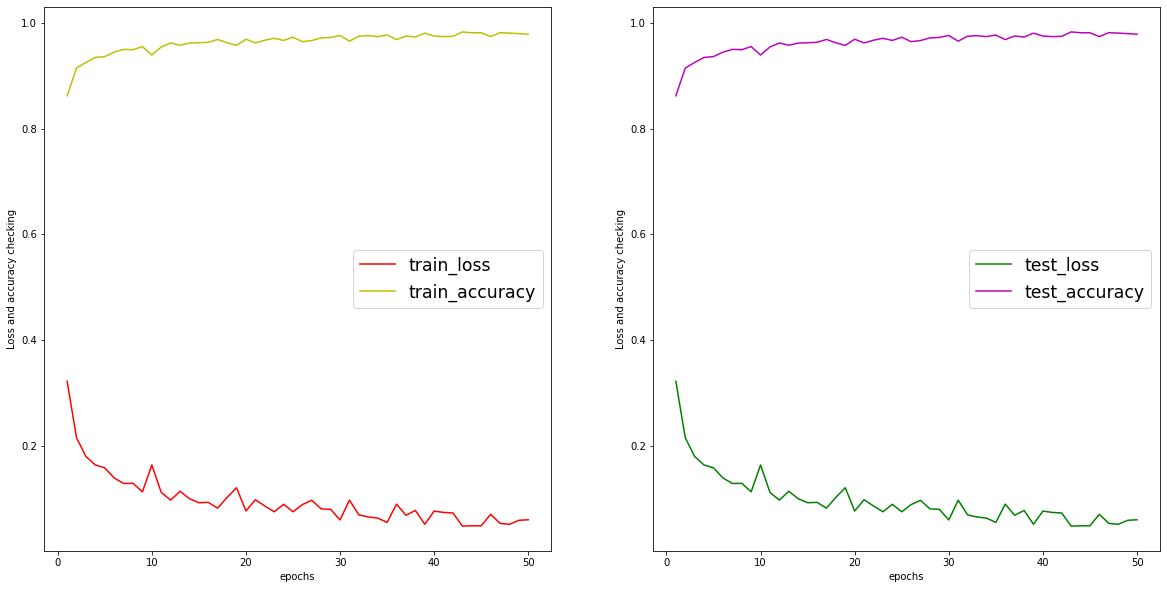

In [62]:
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.plot(epochs,train_loss,color='r',label='train_loss')
plt.plot(epochs,train_accuracy,color='y',label='train_accuracy')
plt.legend(loc='best',fontsize='xx-large')
plt.xlabel("epochs")
plt.ylabel('Loss and accuracy checking')
plt.subplot(1,2,2)
plt.plot(epochs,test_loss,color='g',label='test_loss')
plt.plot(epochs,test_accuracy,color='m',label='test_accuracy')
plt.xlabel("epochs")
plt.ylabel('Loss and accuracy checking')
plt.legend(loc='best',fontsize='xx-large')
plt.show()

In [63]:
from tensorflow.keras.preprocessing import image

In [72]:
classes = {0:"Cat",1:'Dog'}
for i in classes.items():
    print(i)

(0, 'Cat')
(1, 'Dog')


In [ ]:
## Predicting (testing)

[[1. 0.]]
[0]
Cat


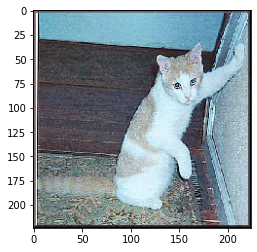

In [73]:
image_path = '/content/drive/MyDrive/Projects ME/Dog and cat classification/Dog and cat classification/test_set/test_set/cats/cat.4001.jpg'
new_img = image.load_img(image_path,target_size=(224,224))
img = image.img_to_array(new_img)
img = np.expand_dims(img,axis=0)
prediction = model.predict(img)
print(prediction)
prediction = np.argmax(prediction,axis=1)
print(prediction)
print(classes[prediction[0]])
plt.imshow(new_img)


[[0. 1.]]
[1]
Dog


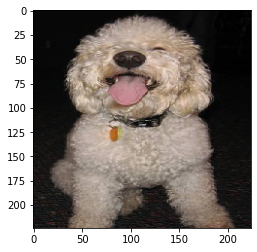

In [68]:
image_path = '/content/drive/MyDrive/Projects ME/Dog and cat classification/Dog and cat classification/test_set/test_set/dogs/dog.4003.jpg'
new_img = image.load_img(image_path,target_size=(224,224))
img = image.img_to_array(new_img)
img = np.expand_dims(img,axis=0)
prediction = model.predict(img)
print(prediction)
prediction = np.argmax(prediction,axis=1)
print(prediction)
print(classes[prediction[0]])
plt.imshow(new_img)


[[0. 1.]]
[1]
Dog


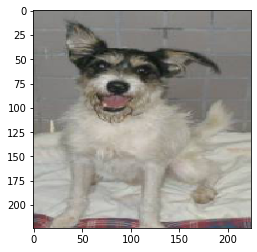

In [74]:
image_path = '/content/drive/MyDrive/Projects ME/Dog and cat classification/Dog and cat classification/test_set/test_set/dogs/dog.4028.jpg'
new_img = image.load_img(image_path,target_size=(224,224))
img = image.img_to_array(new_img)
img = np.expand_dims(img,axis=0)
prediction = model.predict(img)
print(prediction)
prediction = np.argmax(prediction,axis=1)
print(prediction)
print(classes[prediction[0]])
plt.imshow(new_img)


[[1. 0.]]
[0]
Cat


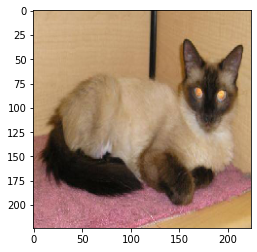

In [75]:
image_path = '/content/drive/MyDrive/Projects ME/Dog and cat classification/Dog and cat classification/test_set/test_set/cats/cat.4019.jpg'
new_img = image.load_img(image_path,target_size=(224,224))
img = image.img_to_array(new_img)
img = np.expand_dims(img,axis=0)
prediction = model.predict(img)
print(prediction)
prediction = np.argmax(prediction,axis=1)
print(prediction)
print(classes[prediction[0]])
plt.imshow(new_img)


[[0. 1.]]
[1]
Dog


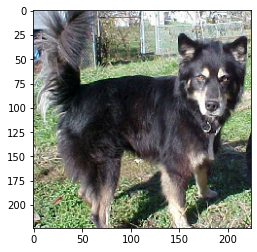

In [77]:
image_path = '/content/drive/MyDrive/Projects ME/Dog and cat classification/Dog and cat classification/test_set/test_set/dogs/dog.4012.jpg'
new_img = image.load_img(image_path,target_size=(224,224))
img = image.img_to_array(new_img)
img = np.expand_dims(img,axis=0)
prediction = model.predict(img)
print(prediction)
prediction = np.argmax(prediction,axis=1)
print(prediction)
print(classes[prediction[0]])
plt.imshow(new_img)


[[1. 0.]]
[0]
Cat


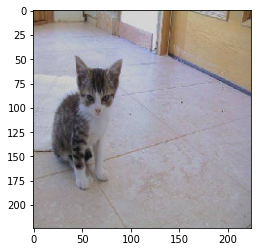

In [124]:
image_path = '/content/drive/MyDrive/Projects ME/Dog and cat classification/Dog and cat classification/test_set/test_set/cats/cat.4032.jpg'
new_img = image.load_img(image_path,target_size=(224,224))
img = image.img_to_array(new_img)
img = np.expand_dims(img,axis=0)
prediction = model.predict(img)
print(prediction)
prediction = np.argmax(prediction,axis=1)
print(prediction)
print(classes[prediction[0]])
plt.imshow(new_img)
